In [1]:
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline
import time
import seaborn as sns

In [2]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [3]:
import unidecode
from unidecode import unidecode
import requests

In [17]:
import pandas as pd
import datetime
%matplotlib inline
from dateutil.parser import parse

In [4]:
# from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys

In [61]:
driver = webdriver.Chrome()

In [62]:
driver.get('https://www.google.com/flights/explore/')

In [63]:
def scrape_data(start_date, from_place, to_place, city_name):
    to_input = driver.find_element_by_xpath('//*[@id="root"]/div[3]/div[3]/div/div[4]/div/div')
    to_input.click()
    to_action = ActionChains(driver)
    to_action.send_keys(to_place)
    to_action.send_keys(Keys.ENTER)
    to_action.perform()
    
    from_input = driver.find_element_by_xpath('//*[@id="root"]/div[3]/div[3]/div/div[2]/div/div')
    from_input.click()
    from_action = ActionChains(driver)
    from_action.send_keys(from_place)
    from_action.send_keys(Keys.ENTER)
    from_action.perform() 
    
    time.sleep(5)
    current_url = driver.current_url
    split_url = current_url.split('2017')
    new_url = split_url[0] + start_date
    driver.get(new_url)    
    
    time.sleep(5)
    results = driver.find_elements_by_class_name('LJTSM3-v-c')
    

    result_names = []
    for i in range(len(results)):
        result_names.append(results[i].text)

    cities = []
    for city in result_names:
        name = city.split(',')
        cities.append(unidecode(name[0]))
    
    lower_case = [x.lower() for x in cities]
    if city_name.lower() in lower_case:
        city_index = lower_case.index(city_name.lower())
    
    time.sleep(2)
    
    box_class = driver.find_elements_by_class_name("LJTSM3-v-m")
    test = box_class[city_index]
    bars = test.find_elements_by_class_name('LJTSM3-w-x')

    time.sleep(1)

    data = []

    for bar in bars:
        ActionChains(driver).move_to_element(bar).perform()
        time.sleep(0.00001)
        data.append((test.find_element_by_class_name('LJTSM3-w-k').find_elements_by_tag_name('div')[0].text,
           test.find_element_by_class_name('LJTSM3-w-k').find_elements_by_tag_name('div')[1].text))

    time.sleep(2)

    d = data[0]
    clean_data = [(float(d[0].replace('$', '').replace(',', '')), (parse(d[1].split('-')[0].strip()) - datetime.datetime(2017,4,4,0,0)).days)
                      for d in data]

    time.sleep(3)

    df = pd.DataFrame(clean_data, columns=['Price','Start_Date'])
    return df


In [64]:
scrape_data('2017-04-07','NYC','Europe','Madrid')

,Price,Start_Date
0,1131.0,3
1,1131.0,4
2,851.0,5
3,551.0,6
4,640.0,7
5,821.0,8
6,851.0,9
7,918.0,10
8,1051.0,11
9,767.0,12


In [65]:
#Task2

In [71]:
def scrape_data_90(start_date, from_place, to_place, city_name):
    
    to_input = driver.find_element_by_xpath('//*[@id="root"]/div[3]/div[3]/div/div[4]/div/div')
    to_input.click()
    to_action = ActionChains(driver)
    to_action.send_keys(to_place)
    to_action.send_keys(Keys.ENTER)
    to_action.perform()
    
    from_input = driver.find_element_by_xpath('//*[@id="root"]/div[3]/div[3]/div/div[2]/div/div')
    from_input.click()
    from_action = ActionChains(driver)
    from_action.send_keys(from_place)
    from_action.send_keys(Keys.ENTER)
    from_action.perform() 
    
    time.sleep(5)
    current_url = driver.current_url
    split_url = current_url.split('2017')
    new_url = split_url[0] + start_date
    driver.get(new_url)    
    
    time.sleep(5)
    results = driver.find_elements_by_class_name('LJTSM3-v-c')
    

    result_names = []
    for i in range(len(results)):
        result_names.append(results[i].text)

    cities = []
    for city in result_names:
        name = city.split(',')
        cities.append(unidecode(name[0]))
    
    lower_case = [x.lower() for x in cities]
    if city_name.lower() in lower_case:
        city_index = lower_case.index(city_name.lower())
    
    time.sleep(2)
    
    box_class = driver.find_elements_by_class_name("LJTSM3-v-m")
    test = box_class[city_index]
    bars = test.find_elements_by_class_name('LJTSM3-w-x')

    time.sleep(1)
    data_90 = []

    for bar in bars:
        ActionChains(driver).move_to_element(bar).perform()
        time.sleep(0.00001)
        data_90.append((test.find_element_by_class_name('LJTSM3-w-k').find_elements_by_tag_name('div')[0].text,
           test.find_element_by_class_name('LJTSM3-w-k').find_elements_by_tag_name('div')[1].text))
    
    move_bars_input = driver.find_element_by_xpath('//*[@id="root"]/div[3]/div[4]/div/div[2]/div[1]/div/div[2]/div[2]/div/div[2]/div[5]')
    move_bars_input.click()
    move_bars_input = ActionChains(driver)
    move_bars_input.perform()
    
    time.sleep(5)
    results = driver.find_elements_by_class_name('LJTSM3-v-c')
    result_names = []
    for i in range(len(results)):
        result_names.append(results[i].text)

    cities = []
    for city in result_names:
        name = city.split(',')
        cities.append(unidecode(name[0]))
        
    lower_case = [x.lower() for x in cities]
    if city_name.lower() in lower_case:
        city_index = lower_case.index(city_name.lower())
        
    time.sleep(2)
        
    box_class = driver.find_elements_by_class_name("LJTSM3-v-m")
    test = box_class[city_index]
    bars = test.find_elements_by_class_name('LJTSM3-w-x')
    
    next_data= []
    for bar in bars:
        ActionChains(driver).move_to_element(bar).perform()
        time.sleep(0.00001)
        next_data.append((test.find_element_by_class_name('LJTSM3-w-k').find_elements_by_tag_name('div')[0].text,
           test.find_element_by_class_name('LJTSM3-w-k').find_elements_by_tag_name('div')[1].text))
    
    time.sleep(3)
    for element in next_data:
        if element not in data_90:
            data_90.append(element)
            
    d = data_90[0]
    clean_data = [(float(d[0].replace('$', '').replace(',', '')), (parse(d[1].split('-')[0].strip()) - datetime.datetime(2017,4,4,0,0)).days)
                      for d in data_90]
    
    df_90 = pd.DataFrame(clean_data, columns=['Price','Start_Date'])
    return df_90   
    

In [72]:
scrape_data_90('2017-04-07','NYC','Europe','Madrid')

,Price,Start_Date
0,1131.0,3
1,1131.0,4
2,851.0,5
3,551.0,6
4,640.0,7
5,821.0,8
6,851.0,9
7,918.0,10
8,1051.0,11
9,767.0,12


In [446]:
#Task 3 - IQR

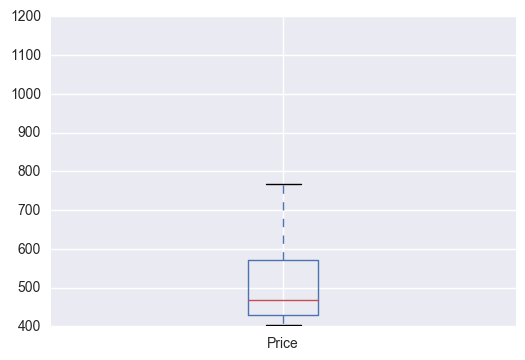

In [53]:
df['Price'].plot.box()

In [54]:
import numpy as np

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [55]:
outliers_iqr(df['Price'])

(array([0, 1, 2, 3, 5, 6, 7, 8], dtype=int64),)

In [56]:
q75, q25 = np.percentile(df.Price, [75 ,25])
iqr = q75 - q25
 
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)

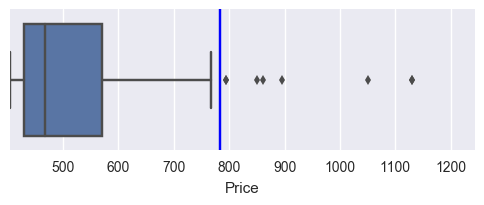

In [57]:
i = 'Price'
 
# plt.figure(figsize=(10,8))
# plt.subplot(211)
# plt.xlim(df[i].min(), df[i].max()*1.1)
# plt.axvline(x=min)
# plt.axvline(x=max)
 
ax = df[i].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(df[i].min(), df[i].max()*1.1)
sns.boxplot(x=df[i])
plt.axvline(x=min)
plt.axvline(x=max)

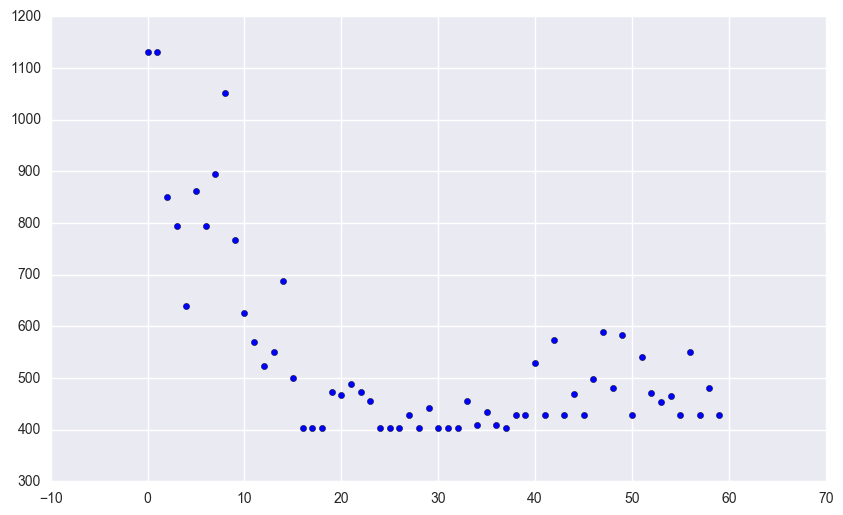

In [58]:
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(np.arange(len(df['Price'])), df['Price'])

In [59]:
px = [x for x in df['Price']]
ff = pd.DataFrame(px, columns=['Price_of_flight']).reset_index()

C:\Users\ajain\Anaconda2\lib\site-packages\matplotlib\lines.py:1145: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


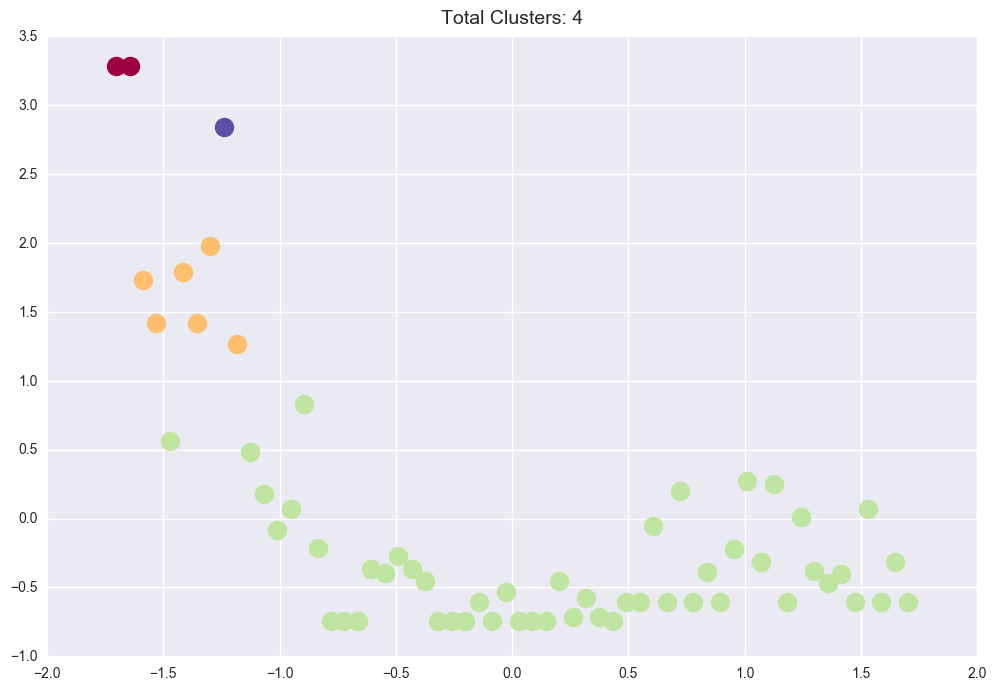

In [60]:
X = StandardScaler().fit_transform(ff) 
db = DBSCAN(eps = 0.5, min_samples = 1).fit(X)

labels = db.labels_
clusters = len(set(labels))
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

plt.subplots(figsize = (12,8))

for k,c in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor = c, markeredgecolor = 'k',markersize = 14)
    
    
plt.title('Total Clusters: {}'.format(clusters), fontsize = 14, y = 1.01)   